In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bl_c = pd.read_csv("bd_count.csv")
bl = pd.read_csv("bd.csv")
rem = pd.read_csv("blrem.csv")

# rem["type"] = "rem"

bl["elementcount"] = bl_c["elemcount"]
bl["nodecount"] = bl_c["nodecount"]

# bl["type"] = "baseline"
bl_msfn = bl["msfn"].to_numpy()
bl = bl.drop(columns=["sim","elementcount","nextime","msfn"])
bl["baseline numerical"] = bl_msfn

rem["remiter"] = rem["remiter"] + 1
for index, row in rem.iterrows():
    if (rem.iloc[index,1] == 1) & (index % 2 == 0):
       rem.iloc[index,1] = rem.iloc[index,1] - 1
itc = 2
r2 = rem[rem["remiter"] <= itc].reindex()
r2_total_nodes = r2.groupby("simiter").sum(numeric_only=True)["nodecount"].to_numpy()

r2 = rem[rem["remiter"] == itc].copy()
r2 = r2.reset_index(drop=True)

r2 = r2.drop(columns=["nextime","tthtime","meshtime","nodecount","elementcount","remiter"])
r2["cumulative nodecount"] = r2_total_nodes
r2_total_nodes


array([7113, 6406, 7061, 6369, 5008, 4608, 4416, 4276, 3830, 3982])

In [3]:
sns.set_theme("poster")
sns.set_style("white")
sns.set_palette("colorblind")

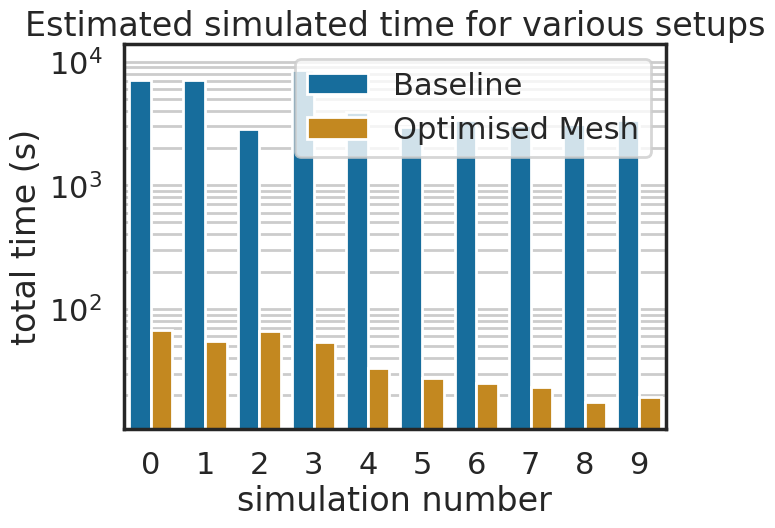

In [13]:
bl_temp = bl.copy()
r2_temp = r2.copy()

r2_temp["kind"] = "Optimised Mesh"
bl_temp["kind"] = "Baseline"

bl_temp["numerical"] = bl_temp["baseline numerical"]
bl_temp["R"] = r2_temp["R"]
bl_temp["W"] = r2_temp["W"]
bl_temp["simiter"] = r2_temp["simiter"]
bl_temp = bl_temp.drop(columns=["baseline numerical"])

r2_temp["nodecount"] = r2_temp["cumulative nodecount"]
r2_temp = r2_temp.drop(columns=["cumulative nodecount"])

comb = pd.concat([bl_temp,r2_temp])
comb = comb.reset_index(drop=True)

# estimate total time
a,b,c = (8.494801325977266e-07,0.005900645967781035,-17.48939523784991)
totaltime = lambda N : a*N**2 + b*N**1 + c

comb["totaltime"] = totaltime(comb["nodecount"])

f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=comb,x="simiter",y="totaltime",hue="kind",ax=ax)
ax.set(yscale="log")
# ax.legend()
plt.title("Estimated simulated time for various setups")
plt.xlabel("simulation number")
plt.ylabel("total time (s)")
plt.grid(axis="y")

t1 = list(np.linspace(0,9,10))
t2 = list(np.linspace(1e1 ,9e1,9))
t3 = list(np.linspace(1e2,9e2,9))
t4 = list(np.linspace(1e3,1e4,10))

t1.extend(t2)
t1.extend(t3)
t1.extend(t4)

# f.legend()
ax.legend()

plt.yticks(t1)
plt.margins(y=0.08)
plt.show()


In [5]:
t1 = list(np.linspace(0,9,10)*1e-11)
t2 = list(np.linspace(1e1 ,9e1,9)*1e-11)
t3 = list(np.linspace(1e2,9e2,9)*1e-11)
t4 = list(np.linspace(1e3,1e4,10)*1e-11)

t1.extend(t2)


t1

[0.0,
 1e-11,
 2e-11,
 3e-11,
 4e-11,
 4.9999999999999995e-11,
 6e-11,
 6.999999999999999e-11,
 8e-11,
 9e-11,
 9.999999999999999e-11,
 1.9999999999999998e-10,
 3e-10,
 3.9999999999999996e-10,
 4.999999999999999e-10,
 6e-10,
 7e-10,
 7.999999999999999e-10,
 9e-10]

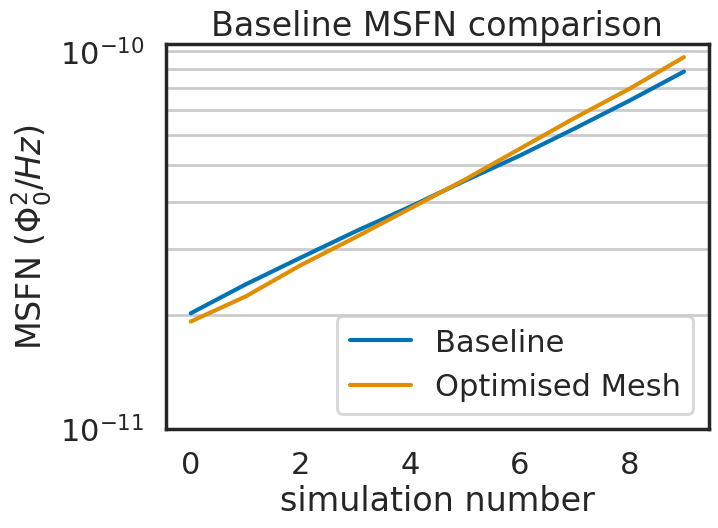

4.857521818111266
8.424520470860358
0.667623644949384


In [14]:
error = abs(bl["baseline numerical"] - r2["numerical"])/r2["numerical"]*100

error = error.to_list()
comb["error"] = error * 2
comb["area"] = np.power(comb["R"].to_numpy(),2)*1e12 - np.power(comb["R"] - comb["W"].to_numpy(),2)*1e12 
erdf = comb[comb["kind"] == "Optimised Mesh"]

# sns.relplot(data=erdf,y="error",x="simiter")
f, ax = plt.subplots(figsize=(7, 5))
ax.set(yscale="log")
sns.lineplot(data=comb,x="simiter",y="numerical",hue="kind",ax=ax)
ax.legend()
# ax.set_ylim(8e-12,2e-10)
plt.title("Baseline MSFN comparison")
plt.xlabel("simulation number")
plt.ylabel("MSFN ($\Phi_0^2/Hz$)")
plt.grid(axis="y")
t1 = list(np.linspace(1,9,9)*1e-11)
t2 = list(np.linspace(1e1 ,9e1,9)*1e-11)
t1.extend(t2[0:-8])
plt.yticks(t1)

plt.show()


sqerr = np.power(np.array(error)/100,2)
# print(np.mean(sqerr)*100)
# print(np.max(sqerr)*100)

print(np.mean(np.array(error)))
print(np.max(np.array(error)))
print(np.min(np.array(error)))

In [7]:
bltime = totaltime(bl_temp["nodecount"]).to_numpy()
r2time = totaltime(r2_temp["nodecount"]).to_numpy()

print(np.mean(bltime/r2time))
print(np.max(bltime/r2time))
print(np.min(bltime/r2time))

127.07615893997817
177.34385602163218
42.467618775274616


In [8]:
comb["area"]

0      91.000000
1      95.419753
2      98.456790
3     100.111111
4     100.382716
5      99.271605
6      96.777778
7      92.901235
8      87.641975
9      81.000000
10     91.000000
11     95.419753
12     98.456790
13    100.111111
14    100.382716
15     99.271605
16     96.777778
17     92.901235
18     87.641975
19     81.000000
Name: area, dtype: float64